# Práctica 7: Regresión múltiple con statsmodels
## Gabriela Sánchez Y.

El objetivo de la práctica es extender el análisis realizado previamente, ahora se analizan modelos lineales con más de un factor. La variable de interés es la cantidad de incidentes reportados de violencia.

Se revisa primero el efecto combinado que tiene el mes y el horario de los incidentes.

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context

datos = pd.read_csv("vf_datos.csv")
#datos.hora.replace(to_replace = dict(M = 0, T = 1, N = 2), inplace = True)
datos['cuantos'] = 1
datos.dtypes

mes                int64
mpio               int64
fecha             object
hora               int64
victima            int64
sexo_v            object
edad_v            object
parentesco        object
edo_civil_v       object
ocupacion_v       object
escolaridad_v     object
agresor          float64
sexo_a            object
edad_a            object
edo_civil_a       object
ocupacion_a       object
escolaridad_a     object
pob                int64
cuantos            int64
dtype: object

In [5]:
a = datos.groupby(['mes','hora'], as_index=False).agg({"cuantos": "sum"})

y = a['cuantos'] # variable dependiente

x = a[['mes','hora']] # variables independientes
x = sm.add_constant(x) 

m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                cuantos   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     71.56
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           6.55e-26
Time:                        03:52:10   Log-Likelihood:                -1292.4
No. Observations:                 288   AIC:                             2591.
Df Residuals:                     285   BIC:                             2602.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0180      3.444      8.715      0.0

Los resultados del modelo indican que las variables independientes no describen muy bien a la variable dependiente, ya que el valor de _R cuadrado_ es 0.334. Además los resultados del _t-test_ indican que la hora se relaciona de forma significativa con el número de casos registrados.

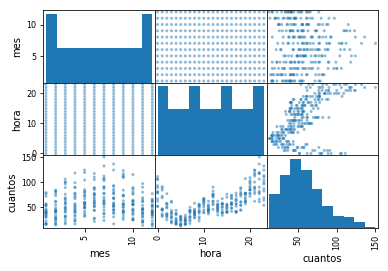

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(a) 
plt.show()

Se incluyen más variables esperando una posible mejora. Ahora se considera también el lugar del incidente, es decir el municipio.

In [11]:
a = datos.groupby(['mes','hora','mpio'], as_index=False).agg({"cuantos": "sum"})

y = a['cuantos'] # variable dependiente

x = a[['mes','hora', 'mpio']] # variables independientes
x = sm.add_constant(x) 

m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                cuantos   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     37.09
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.15e-23
Time:                        04:00:07   Log-Likelihood:                -11908.
No. Observations:                4418   AIC:                         2.382e+04
Df Residuals:                    4414   BIC:                         2.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4790      0.184     13.469      0.0

Los resultados no muestran alguna mejora y no se ha obtenido nueva información de este modelo. 

Se revisa la posible relación entre el estado civil, la edaad y sexo de las víctimas con la cantidad de incidentes.

In [18]:
edo_civil = datos.edo_civil_v
civil = []
for dato in edo_civil:
    s = str(dato).replace(",", " ")
    s = str(s).replace("UNIÓN LIBRE", "UL")
    pedazos = s.split()  
    pedazos = ["SOLTERO" if (v == "DIVORCIADO" or v == "SEPARADO" or v == "VIUDO" or v == "SOLTERO") 
               else "CASADO" if (v == "UL" or v == "CASADO") else "NE" for v in pedazos]
    civil += pedazos
    
    
edadv = datos.edad_v # edades de las victimas
edad_v = []
for dato in edadv:
    s = str(dato).replace(",", " ")
    pedazos = s.split()   
    while "a" in pedazos:
        pos = pedazos.index("a")
        desde = int(pedazos[pos - 1])
        hasta = int(pedazos[pos + 1])
        prom = (desde + hasta) // 2
        edad_v.append(prom)
        pedazos = pedazos[:(pos - 1)] + pedazos[(pos + 2):]
    edad_v += pedazos

    
sexo_v = datos.sexo_v
sexo = []
for dato in sexo_v:
    s = str(dato).replace(",", " ")
    pedazos = s.split()   
    sexo += pedazos
    
    
b = pd.DataFrame({'edad': edad_v, 'edo_civil': civil, 'sexo': sexo})
b['cuantos'] = 1
b.edo_civil.replace(to_replace = dict(SOLTERO = 0, CASADO = 1), inplace = True)
b.sexo.replace(to_replace = dict(M = 0, F = 1), inplace = True)


c = b.groupby(['edad', 'edo_civil', 'sexo'], as_index=False).agg({"cuantos": "sum"})
c = c[c.edad != 'NE']
c['edad'] = [int(t) for t in c.edad]
c = c[c.edo_civil != 'NE']
#c = c[c.edo_civil != NaN]
c['edo_civil'] = [int(t) for t in c.edo_civil]

##### modelo
y = c['cuantos'] # variable dependiente

x = c[['edad','edo_civil','sexo']] # variables independientes
x = sm.add_constant(x) 

m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                cuantos   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     46.87
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.57e-25
Time:                        04:04:54   Log-Likelihood:                -2070.2
No. Observations:                 358   AIC:                             4148.
Df Residuals:                     354   BIC:                             4164.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5281     10.274      3.750      0.0

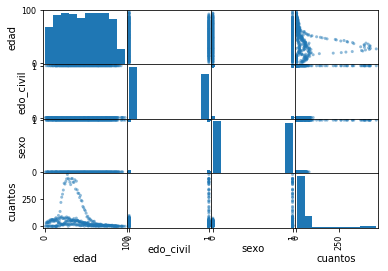

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(c) 
plt.show()

El resultado para el _R cuadrado_ indica que el ajuste del modelo no es bueno. Sin embargo, los resultados en la significancia del _t-test_ sugieren que todas las variables independientes se relacionan de forma significativa con el número de incidentes. 

El análisis del coeficiente beta expresa que la relación entre los casos reportados y la edad de la víctima es negativa, esto es, el número de incidentes de violencia familiar disminuyen para víctimas de mayor edad.   

Hay que revisar la correlación entre las variables independientes.

               edad  edo_civil      sexo   cuantos
edad       1.000000   0.033120 -0.018708 -0.274371
edo_civil  0.033120   1.000000 -0.000814  0.295435
sexo      -0.018708  -0.000814  1.000000  0.345863
cuantos   -0.274371   0.295435  0.345863  1.000000


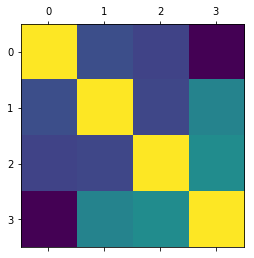

In [20]:
print(c.corr())
plt.matshow(c.corr())

Parece no haber una relación fuerte entre las variables independientes. 